# Spike Challenge - Predicción de precios de insumos básicos en Chile

Postulante: Cristóbal Quezada

python: 3.9

En este desafío vamos a ver si somos capaces de predecir el precio de un insumo básico,
como la leche, a partir de variables climatológicas y macroeconómicas. No siempre estos
datos nos entregan toda la información que nos gustaría, como por ejemplo señales claras
del avance de la sequía a lo largo del país, sin embargo, nos permite entender otro tipo de
efectos, como movimientos en ciertos sectores de la economía. En esta línea, te iremos
guiando para construir un análisis y algunos modelos que nos ayuden a concluir.

## 1. Datos: Precipitaciones, Indicadores Económicos Banco Central
Cargar los datos de precipitaciones.csv y banco_centreal.csv

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import math
import seaborn as sn
# set seed para resultados reproducibles

In [2]:
precipitaciones = pd.read_csv('precipitaciones.csv')
banco_central = pd.read_csv('banco_central.csv')

In [3]:
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [4]:
banco_central.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0


## 2. Análisis de datos. Creación de variables
### 2.1 Precipitaciones

In [5]:
print('Columnas dataset precipitaciones')
print(list(precipitaciones.columns))

Columnas dataset precipitaciones
['date', 'Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago', 'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio', 'La_Araucania', 'Los_Rios']


El dataset precipitaciones contine información  de la precipitaciones por día en las regiones de Coquimbo, Valparaiso, Santiago, O'Higgins, Maule, Bio-bio, La Araucania y Los Rios. Las precipitaciones están en mm.

In [6]:
precipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [7]:
# Datos faltantes
precipitaciones.isna().sum()

date                                   0
Coquimbo                               0
Valparaiso                             0
Metropolitana_de_Santiago              0
Libertador_Gral__Bernardo_O_Higgins    0
Maule                                  0
Biobio                                 0
La_Araucania                           0
Los_Rios                               0
dtype: int64

In [8]:
print('Fechas de precipitaciones')
print('Fecha mínima:', precipitaciones['date'].min())
print('Fecha máxima', precipitaciones['date'].max())

Fechas de precipitaciones
Fecha mínima: 1979-01-01
Fecha máxima 2020-04-01


In [9]:
fecha_max = datetime.strptime(precipitaciones['date'].max(), '%Y-%m-%d')
fecha_min = datetime.strptime(precipitaciones['date'].min(), '%Y-%m-%d')
print('Cantidad de dias en el rango de fechas:',(fecha_max - fecha_min).days)

Cantidad de dias en el rango de fechas: 15066


In [10]:
(2020-1979)*12 + 4

496

La cantidad de registros de fechas es 496 y la cantidad de dias en el rango de fechas es 15066. Hay un registro para cada dia primero del mes. Desde el 1 de Enero de 1979 hasta el 1 de abril de 2020. Los datos pertencen a las precipitaciones mensuales por región.

In [11]:
precipitaciones = precipitaciones.sort_values(by=['date'])

In [12]:
precipitaciones

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
170,1979-01-01,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447
465,1979-02-01,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039
305,1979-03-01,0.255490,0.020601,0.000000,0.055488,0.545324,14.435698,28.696504,66.232248
441,1979-04-01,10.173699,11.745779,13.722349,12.989194,21.880607,39.136483,43.617921,73.548127
217,1979-05-01,1.039098,18.609286,50.187148,104.451550,143.914334,219.729235,279.409718,438.005116
...,...,...,...,...,...,...,...,...,...
410,2019-12-01,0.287895,0.165390,3.601443,6.198806,11.327313,14.014122,27.321858,62.170090
38,2020-01-01,3.299797,2.003685,6.937148,6.154279,7.875591,19.518225,35.916618,63.389625
166,2020-02-01,0.179216,0.003701,0.032064,0.017628,0.200483,10.108504,29.001988,55.838889
7,2020-03-01,0.003451,0.000666,0.000000,0.000000,0.115566,12.462699,28.310937,73.640866


In [13]:
precipitaciones = precipitaciones.reset_index(drop=True)
# transformar precipitaciones string a formato fecha
precipitaciones['date'] = precipitaciones['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [14]:
precipitaciones['date'].iloc[0].year

1979

In [15]:
# para el plot
precipitaciones['date-str'] = precipitaciones['date'].apply(lambda x: str(x.month)+'-'+str(x.year))

In [16]:
def graficar_precipitaciones(df):
    fecha_label = df['date-str'].to_list()
    plt.figure(figsize=(20,5))
    plt.plot(fecha_label, df['Coquimbo'].to_list())
    plt.plot(fecha_label, df['Valparaiso'].to_list(), c='b')
    plt.plot(fecha_label, df['Metropolitana_de_Santiago'].to_list(), c='y')
    plt.plot(fecha_label, df['Libertador_Gral__Bernardo_O_Higgins'].to_list())
    plt.plot(fecha_label, df['Maule'].to_list())
    plt.plot(fecha_label, df['Biobio'].to_list())
    plt.plot(fecha_label, df['La_Araucania'].to_list())
    plt.plot(fecha_label, df['Los_Rios'].to_list())
    plt.legend(['Coquimbo]', 'Valparaiso', 'Santiago', 'OHiggins', 'Maule', 'BioBio', 'Araucania', 'Los Rios'])
    plt.xticks(rotation=90)
    plt.xlabel('Fecha')
    plt.ylabel('precipitaciones mensual')
    fecha_max = df['date'].max()
    fecha_min = df['date'].min()
    title = f"Precipitaciones mm desde {fecha_min} hasta {fecha_max}"
    plt.title(title)
    plt.show()

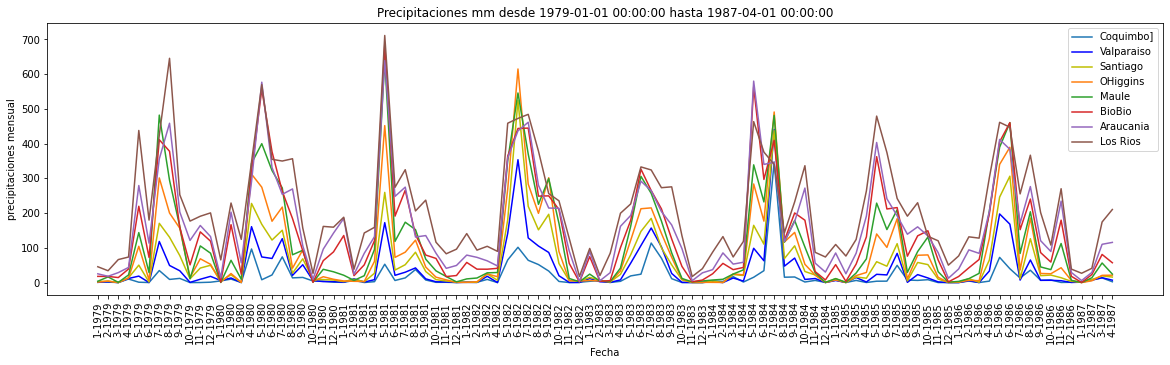

In [17]:
graficar_precipitaciones(precipitaciones[0:100])

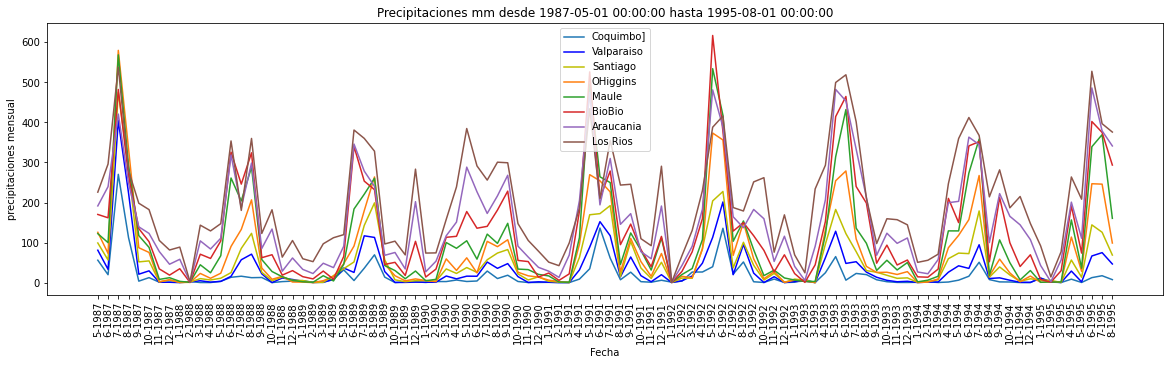

In [18]:
graficar_precipitaciones(precipitaciones[100:200])

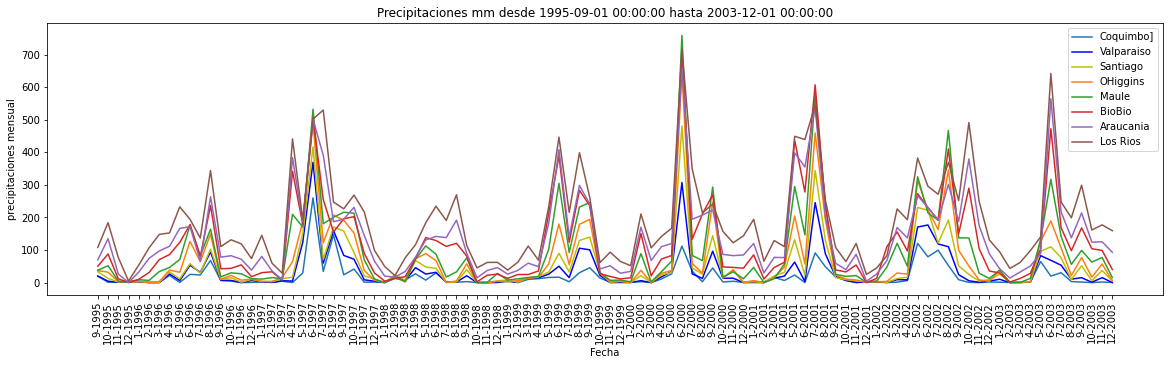

In [19]:
graficar_precipitaciones(precipitaciones[200:300])

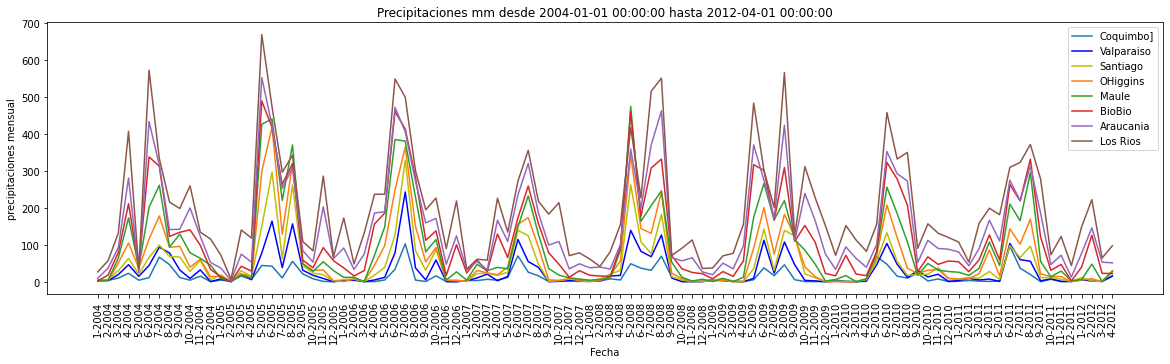

In [20]:
graficar_precipitaciones(precipitaciones[300:400])

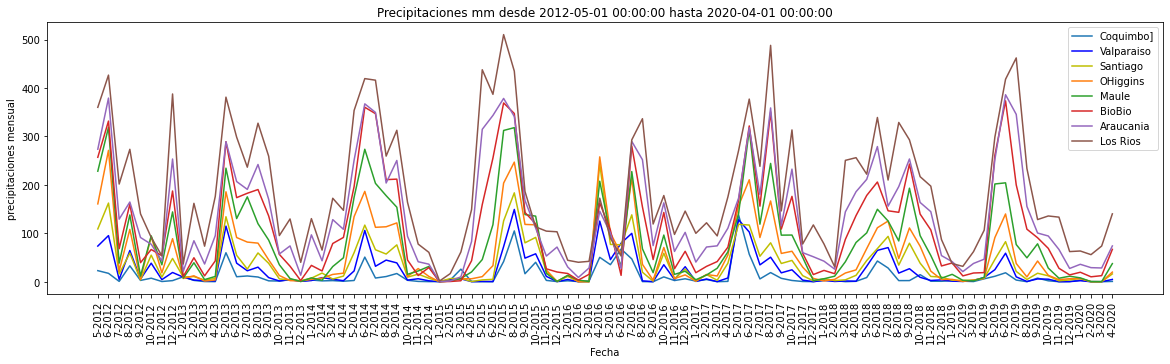

In [21]:
graficar_precipitaciones(precipitaciones[400:])

Se observa de los graficos de precipitaciones una tendencia a tener menores precipitaciones mensuales para los últimos años, en especial para el período desde 2010 hacia adelante donde las precipitaciones máximas alcanzan 500 mm para la región de los Ríos (que es la región con mayores precipitaciones históricas). 

Además se observa del gráfico cierta tendencia, donde las precipitaciones siguen el siguiente orden de mayor a menor:

1. Los Ríos
2. La Araucanía
3. BibioBio
4. Maule
5. Ohiggins
6. Santiago
7. Valparaiso
8. Coquimbo

También, se observa una clara temporalidad en los datos. Donde la mayores precipitaciones estan asociadas al invierno (cercano a Junio) y menores precipitaciones al verano (cercano a Diciembre).


Otro dato que llama la atención es como  disminuyen las preciptaciones en la región del Maule. Esta es la región que en un mes alcanza la máxima precitación de 759 mm y con el tiempo va disminuyendo hasta en el último invierno llegar a una máxima 200 mm aprox.

## 2.2 Indicadores Económicos Banco Central

In [22]:
print('Fecha minima:' ,banco_central['Periodo'].min())
print('Fecha máxima:' ,banco_central['Periodo'].max())

Fecha minima: 1970-01-01 00:00:00 UTC
Fecha máxima: 2020-13-01 00:00:00 UTC


In [23]:
print('Columnas dataset banco central:')
for columna in banco_central.columns:
    print(columna)

Columnas dataset banco central:
Periodo
Imacec_empalmado
Imacec_produccion_de_bienes
Imacec_minero
Imacec_industria
Imacec_resto_de_bienes
Imacec_comercio
Imacec_servicios
Imacec_a_costo_de_factores
Imacec_no_minero
PIB_Agropecuario_silvicola
PIB_Pesca
PIB_Mineria
PIB_Mineria_del_cobre
PIB_Otras_actividades_mineras
PIB_Industria_Manufacturera
PIB_Alimentos
PIB_Bebidas_y_tabaco
PIB_Textil
PIB_Maderas_y_muebles
PIB_Celulosa
PIB_Refinacion_de_petroleo
PIB_Quimica
PIB_Minerales_no_metalicos_y_metalica_basica
PIB_Productos_metalicos
PIB_Electricidad
PIB_Construccion
PIB_Comercio
PIB_Restaurantes_y_hoteles
PIB_Transporte
PIB_Comunicaciones
PIB_Servicios_financieros
PIB_Servicios_empresariales
PIB_Servicios_de_vivienda
PIB_Servicios_personales
PIB_Administracion_publica
PIB_a_costo_de_factores
Impuesto_al_valor_agregado
Derechos_de_Importacion
PIB
Precio_de_la_gasolina_en_EEUU_dolaresm3
Precio_de_la_onza_troy_de_oro_dolaresoz
Precio_de_la_onza_troy_de_plata_dolaresoz
Precio_del_cobre_refinado

Los indicadores se agrupan en:

1. Imacec: El Índice Mensual de Actividad Económica (Imacec) es una estimación que resume la actividad de los distintos sectores de la economía en un determinado mes, a precios del año anterior; su variación interanual constituye una aproximación de la evolución del PIB.
2. PIB
3. IVA
4. Derechos de importación
5. Precio de materias primas
6. Tasa de ocupación en diferentes sectores
7. TCM: El tipo de cambio multilateral (TCM) mide el valor nominal del peso chileno con respecto a una canasta amplia de monedas extranjeras.
8. TCR: El tipo de cambio real de una divisa respecto a otra es el poder de compra de una divisa tras su conversión
9. Indice de producción industrial
10. Generación de energía eléctricas
11. IVC
12. Venta autos nuevos
13. Precio dolar observado

Para hacer el análisis del dataset, se hara un agrupamiento. **Pero, de una inspección visual, se desprende que hay valores no númericos ingresado al dataset**. EN especifico, valores 'a'

In [24]:
banco_central = banco_central.replace('a', None)

In [25]:
banco_central

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,...,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,...,867.806.065,968.087.179,914.276.663,NaN,104.545.429,544.815.032,NaN,NaN,NaN,32206.0
2,2013-05-01 00:00:00 UTC,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796,...,878.030.947,978.471.874,966.913.278,NaN,99.468.801,56.891.916,NaN,NaN,NaN,31589.0
3,2013-06-01 00:00:00 UTC,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235,...,913.180.348,966.647.135,981.820.974,NaN,94.969.678,56.594.867,NaN,NaN,NaN,28457.0
4,2013-07-01 00:00:00 UTC,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305,...,909.263.447,100.100.749,990.198.382,NaN,102.128.977,586.329.899,NaN,NaN,NaN,31736.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2008-08-01 00:00:00 UTC,792.872.358,809.540.557,844.433.727,862.655.599,721.027.743,640.625.573,829.163.596,799.073.886,786.659.097,...,99.298.129,NaN,847.665.895,NaN,905.764.363,475.746.478,NaN,NaN,NaN,NaN
610,2008-09-01 00:00:00 UTC,786.802.278,814.228.983,875.931.483,85.990.071,693.602.068,629.581.947,810.645.789,791.396.405,772.867.447,...,972.530.264,NaN,859.131.907,NaN,894.789.858,453.055.435,NaN,NaN,NaN,NaN
611,2008-10-01 00:00:00 UTC,841.834.519,896.565.998,980.164.017,889.145.021,79.386.738,653.517.611,856.040.952,85.038.187,818.131.883,...,105.609.319,NaN,902.538.952,NaN,981.854.401,478.309.081,NaN,NaN,NaN,NaN
612,2008-11-01 00:00:00 UTC,82.846.325,845.666.687,864.252.442,83.063.253,843.834.773,638.884.202,881.094.389,838.436.575,825.672.572,...,10.738.286,NaN,877.968.927,NaN,914.543.986,466.174.958,NaN,NaN,NaN,NaN


### A. Periodo

In [26]:
periodo = banco_central['Periodo']

In [27]:
periodo.describe()

count                         614
unique                        612
top       2018-08-01 00:00:00 UTC
freq                            2
Name: Periodo, dtype: object

In [28]:
banco_central['Imacec_empalmado']

0      102.796.218
1      101.664.842
2      101.642.954
3      998.310.201
4      964.696.194
          ...     
609    792.872.358
610    786.802.278
611    841.834.519
612     82.846.325
613    881.247.458
Name: Imacec_empalmado, Length: 614, dtype: object

Hay 2 fechas repetidas, por la cual debemos limpiar fechas duplicadas.

In [29]:
banco_central = banco_central.drop_duplicates(subset=['Periodo'])

### B. Imacec

El imasec tiene valores cercanos a 100 y lo que interesa en su variación. 

1. Se parsearan estos datos para tener valores cercanos a 100.
2. Luego se calculará la variación en relación al mes anterior.

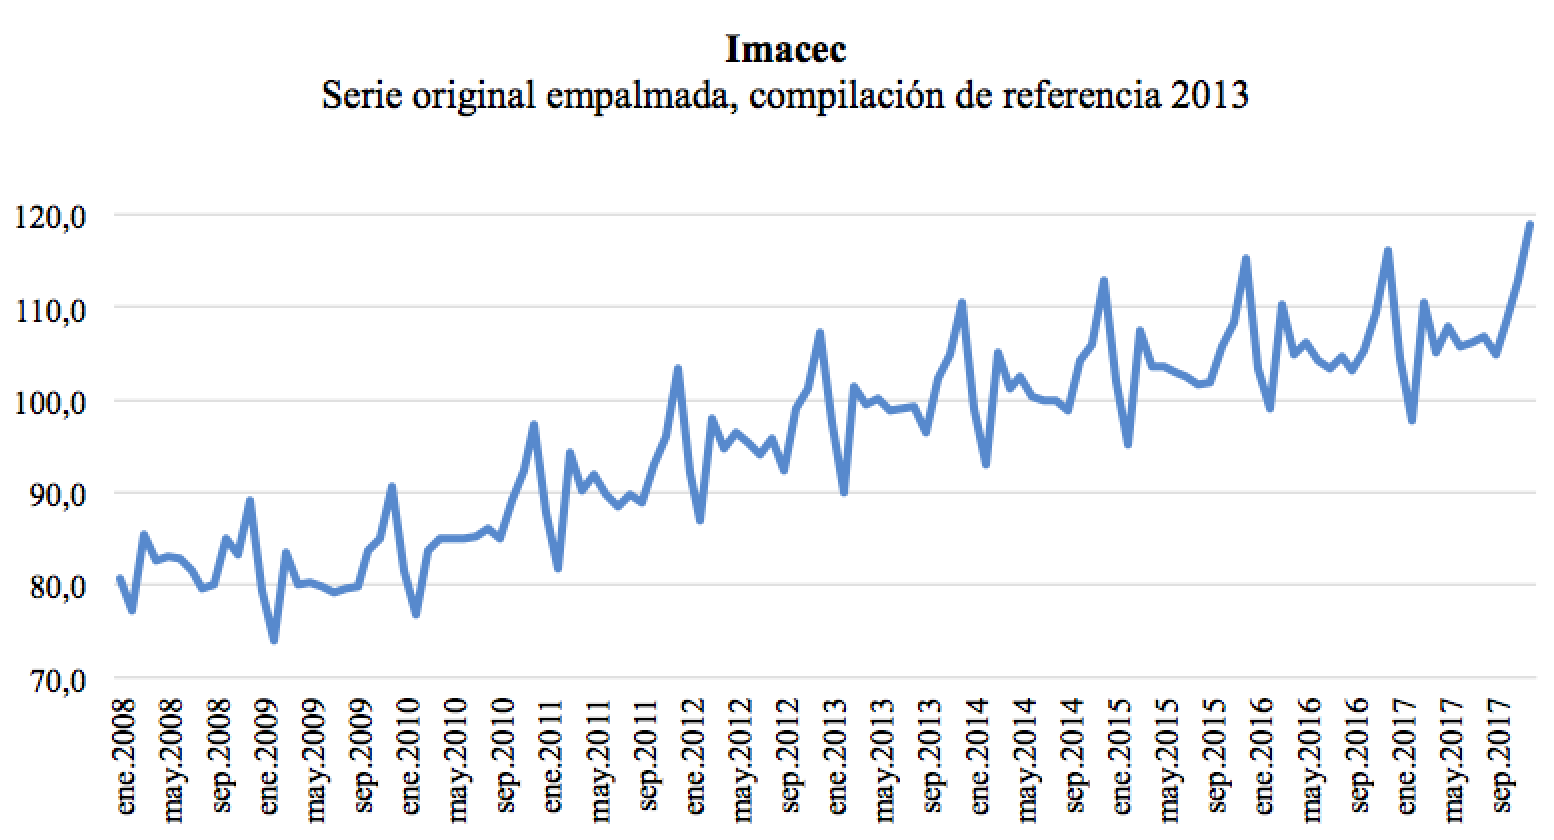

In [30]:
columnas_imacec = ['Imacec_empalmado', 'Imacec_produccion_de_bienes',
       'Imacec_minero', 'Imacec_industria', 'Imacec_resto_de_bienes',
       'Imacec_comercio', 'Imacec_servicios', 'Imacec_a_costo_de_factores',
       'Imacec_no_minero']

In [31]:
banco_central_imacec = banco_central[columnas_imacec]
banco_central_imacec

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero
0,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852
1,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884
2,101.642.954,993.959.922,96.133.164,105.445.361,968.789.055,100.462.117,104.083.216,101.953.299,102.322.796
3,998.310.201,968.367.884,102.400.933,999.212.106,89.190.493,939.504.414,103.857.161,100.222.381,995.139.235
4,964.696.194,961.051.418,980.029.022,100.882.112,901.785.886,92.776.599,969.309.272,962.069.134,962.804.305
...,...,...,...,...,...,...,...,...,...
609,792.872.358,809.540.557,844.433.727,862.655.599,721.027.743,640.625.573,829.163.596,799.073.886,786.659.097
610,786.802.278,814.228.983,875.931.483,85.990.071,693.602.068,629.581.947,810.645.789,791.396.405,772.867.447
611,841.834.519,896.565.998,980.164.017,889.145.021,79.386.738,653.517.611,856.040.952,85.038.187,818.131.883
612,82.846.325,845.666.687,864.252.442,83.063.253,843.834.773,638.884.202,881.094.389,838.436.575,825.672.572


In [32]:
"""
Se transforman las celdas no vacias a un valor flotante
"""
for columna in columnas_imacec:
    for i in range(len(banco_central)):
        try:
            valor = banco_central[columna].iloc[i]
            valor = float(''.join(valor.split('.'))[0:4])
            banco_central[columna].iloc[i] = valor
        except:
            pass

/home/cristobal/anaconda3/envs/my_env/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/home/cristobal/anaconda3/envs/my_env/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [33]:
def dividir_10_100(x):
    """
    Dividir dato por 10 y 100.
    Seleccionar la que esté dentro
    de un rango.
    """
    opcion1 = x/10
    opcion2 = x/100
    if (opcion1 >= 60) & (opcion1 <= 150):
        valor = opcion1
    else:
        valor = opcion2
    return valor

In [34]:
for columna in columnas_imacec:
    banco_central[columna] = banco_central[columna].apply(lambda x: dividir_10_100(x))

<ipython-input-34-0259513132ce>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banco_central[columna] = banco_central[columna].apply(lambda x: dividir_10_100(x))


In [35]:
banco_central_imacec = banco_central[columnas_imacec]
banco_central_imacec.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero
count,298.000000,298.000000,298.000000,298.000000,298.000000,299.000000,298.000000,298.000000,298.000000
mean,80.881275,87.639698,93.487785,86.747685,81.987785,72.268696,78.669060,81.547047,79.028926
std,21.250665,13.755866,10.334191,13.229473,22.046828,28.564440,25.069203,20.651186,23.103555
min,45.350000,57.280000,58.140000,58.360000,44.070000,32.450000,35.480000,46.260000,42.150000
25%,60.145000,76.485000,88.250000,74.747500,64.062500,44.885000,54.797500,61.620000,56.015000
50%,80.320000,87.895000,95.395000,87.985000,79.990000,65.750000,78.995000,81.180000,78.310000
75%,100.650000,98.295000,100.450000,97.995000,96.542500,97.895000,101.875000,100.500000,100.500000
max,122.300000,123.700000,113.600000,112.400000,141.500000,137.200000,123.900000,120.900000,123.200000


Hay periodos muy largos sin Imasec en particular del período del 1970 al 1995. Esta información se obtiene de un análisis de la fuentes de datos, viendo los datos ordenados den fecha de mayor a menor.

Además, se observa el dato de fecha '2020-13-01' que no tiene ningún dato y el formato de fecha es erroneo. 

Luego de realizar el reformateo de los datos del Imacec, se obtiene que el valor mínimo del Imasec es de 32.45, para el Imasec comercio. Pero, el Imasec del percentil 50 esta cercano a 80 para todos los Imasec. 

Nota: Se debe investigar más acerca del Imasec para decidir que valores estar erroenos. Pero el reformateo de los datos es correcto.

In [36]:
banco_central['Periodo'] = banco_central['Periodo'].apply(lambda x: x[0:10])

<ipython-input-36-0bd7080c8bd3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  banco_central['Periodo'] = banco_central['Periodo'].apply(lambda x: x[0:10])


In [37]:
banco_central = banco_central[banco_central['Periodo'] != '2020-13-01']

In [38]:
banco_central['Periodo'] = banco_central['Periodo'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [39]:
banco_central = banco_central.sort_values(by=['Periodo'])
banco_central.to_csv('banco_central_ordenado.csv')

In [40]:
banco_central

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,...,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
146,1970-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,1970-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,1970-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,1970-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,1970-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2020-07-01,96.66,93.33,104.9,96.94,81.34,93.17,99.64,96.63,95.59,...,100.164.187,977.952.851,989.525.701,10.629.584,946.859.919,6477.7,901.338.756,878.226.907,998.894.175,11454.0
92,2020-08-01,101.30,92.68,103.6,98.00,79.82,108.20,104.80,100.50,100.90,...,10.151.671,990.282.658,10.054.901,105.462.309,960.377.084,6452,119.872.405,107.356.493,172.702.233,19037.0
93,2020-09-01,103.20,92.20,100.5,100.10,79.30,111.60,108.30,102.50,103.30,...,100.765.123,981.354.575,986.035.178,99.974.429,972.476.933,6163.1,118.690.966,107.622.401,165.411.522,31897.0
94,2020-10-01,108.40,103.50,103.1,108.40,99.82,116.60,109.70,108.10,108.80,...,102.554.585,104.873.347,102.057.742,10.233.489,10.824.254,6436.9,122.239.313,114.265.499,155.896.885,36243.0


### C. PIB

Se tienen datos del PIB desde Enero del 2013 hasta Septiembre del 2020.

Para trabajar con el PIB, se dejara este dentro del mismo rango de valores, dentro de los cientos. Ya que estos valores luego serán normalizados. 

In [41]:
columnas_pib = ['PIB_Agropecuario_silvicola', 'PIB_Pesca',
       'PIB_Mineria', 'PIB_Mineria_del_cobre', 'PIB_Otras_actividades_mineras',
       'PIB_Industria_Manufacturera', 'PIB_Alimentos', 'PIB_Bebidas_y_tabaco',
       'PIB_Textil', 'PIB_Maderas_y_muebles', 'PIB_Celulosa',
       'PIB_Refinacion_de_petroleo', 'PIB_Quimica',
       'PIB_Minerales_no_metalicos_y_metalica_basica',
       'PIB_Productos_metalicos', 'PIB_Electricidad', 'PIB_Construccion',
       'PIB_Comercio', 'PIB_Restaurantes_y_hoteles', 'PIB_Transporte',
       'PIB_Comunicaciones', 'PIB_Servicios_financieros',
       'PIB_Servicios_empresariales', 'PIB_Servicios_de_vivienda',
       'PIB_Servicios_personales', 'PIB_Administracion_publica',
       'PIB_a_costo_de_factores', 'PIB']

In [42]:
banco_central_pib = banco_central[columnas_pib]

In [43]:
banco_central_pib

,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,...,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,PIB
146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
147,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,188.331.918,707.214.659,1.324.928,119.520.525,130.720.477,123.810.329,369.570.934,13.719.304,164.021.248,67.608.185,...,122.619.775,441.549.174,42.522.432,715.080.906,113.112.652,911.758.222,116.566.888,615.639.916,101.614.557,111.070.003
92,15.867.781,614.712.298,130.864.273,117.055.913,138.696.143,125.163.085,348.252.328,145.265.267,181.336.575,695.058.355,...,148.145.017,471.891.836,407.014.189,711.575.686,110.732.905,919.298.916,140.456.962,617.357.193,105.754.404,116.407.225
93,169.746.171,468.872.234,126.941.868,114.236.494,127.906.055,12.788.268,334.311.036,154.593.729,206.059.133,707.756.582,...,164.601.774,509.565.911,439.254.033,720.980.294,127.546.136,948.454.602,131.205.334,619.801.512,107.849.829,118.574.799
94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
for columna in columnas_pib:
    for i in range(len(banco_central)):
        try:
            valor = banco_central[columna].iloc[i]
            valor = float(''.join(valor.split('.'))[0:4])
            banco_central[columna].iloc[i] = valor
        except:
            pass

/home/cristobal/anaconda3/envs/my_env/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [45]:
def multiplo_100(x):
    """
    Dividir dato por 10 y 100.
    Seleccionar la que esté dentro del rango menores a 900
    de un rango.
    """
    opcion1 = x/10
    opcion2 = x/100
    if ((opcion1/100) > 1) & (opcion1 < 800):
        valor = opcion1
    else:
        valor = opcion2
    return valor



In [46]:
for columna in columnas_pib:
    banco_central[columna] = banco_central[columna].apply(lambda x: multiplo_100(x))

In [47]:
banco_central_pib = banco_central[columnas_pib]

In [48]:
banco_central_pib.describe()

,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,...,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,PIB
count,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,...,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000
mean,354.470968,501.284516,127.243011,114.036129,132.537849,128.662366,343.704301,165.418280,291.133333,682.423763,...,227.051613,591.921505,402.641935,647.130108,122.609677,105.508172,186.770108,565.745161,111.138817,121.531183
std,174.171136,200.951993,8.061360,7.400182,14.034635,6.490024,27.306449,14.603126,48.564304,77.423811,...,30.220766,57.158040,38.128975,54.454330,5.980168,103.131197,159.090863,31.767828,6.779397,7.631157
min,149.700000,80.630000,100.300000,89.400000,97.320000,115.400000,269.000000,137.100000,132.600000,81.110000,...,109.800000,424.600000,321.300000,565.000000,110.300000,80.450000,80.150000,506.900000,95.390000,104.000000
25%,209.500000,432.700000,123.000000,110.100000,123.000000,123.800000,325.400000,155.400000,266.500000,663.000000,...,219.100000,557.500000,376.300000,609.300000,119.200000,87.300000,128.900000,539.900000,106.100000,116.300000
50%,290.700000,545.500000,127.800000,115.200000,131.300000,128.600000,340.100000,164.900000,292.200000,695.000000,...,233.000000,596.400000,404.400000,636.200000,122.400000,90.440000,150.700000,571.600000,111.100000,121.500000
75%,533.600000,637.600000,132.400000,119.000000,140.700000,134.100000,364.600000,173.900000,328.100000,723.800000,...,245.400000,635.000000,422.200000,685.300000,125.700000,94.840000,166.100000,586.600000,115.600000,126.700000
max,704.600000,782.300000,143.400000,128.700000,164.500000,143.600000,398.700000,204.000000,380.300000,766.300000,...,268.300000,683.600000,502.900000,767.600000,135.600000,799.700000,787.000000,619.800000,127.100000,140.500000


El percentil 75 y el maximo no deben estar muy alejados ese es nuestro criterio de aprobación para el reformateo de los datos. 

De igual forma hay algunos datos que quedan mal formateados. Se continua con el procedimiento.


### D. Otros datos

In [49]:
for i in range(len(banco_central)):
    try:
        valor = banco_central['Ocupacion_en_Agricultura_INE'].iloc[i]
        valor = float(''.join(valor.split('.'))[0:4])
        banco_central['Ocupacion_en_Agricultura_INE'].iloc[i] = valor
    except:
        pass
banco_central['Ocupacion_en_Agricultura_INE'] = banco_central['Ocupacion_en_Agricultura_INE'].apply(lambda x: multiplo_100(x))

/home/cristobal/anaconda3/envs/my_env/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [50]:
banco_central['Ocupacion_en_Agricultura_INE'].describe()

count     92.000000
mean     671.810870
std       73.368642
min      420.800000
25%      635.875000
50%      667.800000
75%      727.750000
max      798.000000
Name: Ocupacion_en_Agricultura_INE, dtype: float64

## 3. Visualización 

### 3.1

In [51]:
def graficar_series_historicas(df, region, fecha_inicio, fecha_fin):
    """
    Graficar series históricas de precipitaciones para un
    rango de fechas determinado
    df: pd.dataframe()
    region: str
    fecha_inicio: str (Y-m-d)
    fecha_fin: str ()
    """
    # transformar fechas a formato datetime
    fecha_inicio = datetime.strptime(fecha_inicio, '%Y-%m-%d')
    fecha_fin = datetime.strptime(fecha_fin, '%Y-%m-%d')
    
    # verificar fecha min
    if fecha_inicio < df['date'].min():
        fecha_incio = df['date'].min()
    # verificar fecha max
    if fecha_fin > df['date'].max():
        fecha_fin = df['date'].max()
    filtrar_data = df[(df['date'] <= fecha_fin) & (df['date'] >= fecha_inicio)]                      
    try:
        fecha_label = filtrar_data['date-str'].to_list()
        precipitaciones_region = filtrar_data[region].to_list()
        plt.figure(figsize=(20,5))
        plt.plot(fecha_label, precipitaciones_region)
        plt.xticks(rotation=90)
        plt.xlabel('Fecha')
        plt.ylabel('precipitaciones mensual')
        fecha_max = df['date'].max()
        fecha_min = df['date'].min()
        title = f"Precipitaciones mm desde {fecha_inicio} hasta {fecha_fin} de {region}"
        plt.title(title)
        plt.show()
    except:
        pass
        
        
    
    

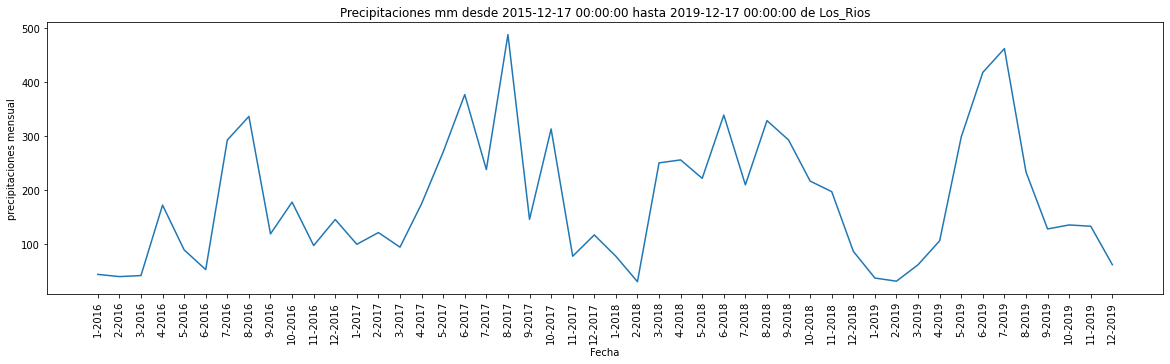

In [52]:
region = 'Los_Rios'
fecha_inicio = '2015-12-17'
fecha_fin = '2019-12-17'
graficar_series_historicas(precipitaciones, region, fecha_inicio, fecha_fin)

### 3.2 Libertador General Bernardo Ohiggins

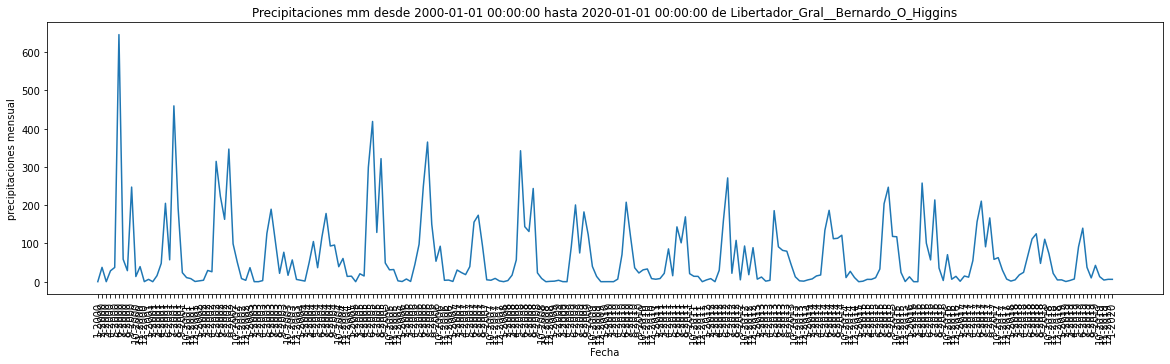

In [53]:
region = 'Libertador_Gral__Bernardo_O_Higgins'
fecha_inicio = '2000-01-01'
fecha_fin = '2020-01-01'
graficar_series_historicas(precipitaciones, region, fecha_inicio, fecha_fin)

Se observan estacionalidades que coinciden con los ciclos de las estaciones en un año.

De la tendencia de las precipitaciones se observa claramente, que han disminuido las precipitaciones mensuales en los periodos de invierno. Partiendo en el 2000 donde se llega a un pick de 600 mm mensuales y en el invierno de 2019 se llega a 200 mm aproximadamente.

### 3.3

In [54]:
def obtener_series_historicas(df, region, fecha_inicio, fecha_fin):
    """
    Graficar series históricas de precipitaciones para un
    rango de fechas determinado
    df: pd.dataframe()
    region: str
    fecha_inicio: str (Y-m-d)
    fecha_fin: str ()
    """
    # transformar fechas a formato datetime
    fecha_inicio = datetime.strptime(fecha_inicio, '%Y-%m-%d')
    fecha_fin = datetime.strptime(fecha_fin, '%Y-%m-%d')
    
    # verificar fecha min
    if fecha_inicio < df['date'].min():
        fecha_incio = df['date'].min()
    # verificar fecha max
    if fecha_fin > df['date'].max():
        fecha_fin = df['date'].max()
    filtrar_data = df[(df['date'] <= fecha_fin) & (df['date'] >= fecha_inicio)]
    meses = ['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio', 'julio',
             'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre']
    filtrar_data['mes'] = filtrar_data['date'].apply(lambda x: meses[x.month-1])
    return filtrar_data['mes'].to_list(), filtrar_data[region].to_list()

In [55]:
def graficar_precipitaciones_anuales(df,lista,region):
    plt.figure(figsize=(20,5))
    for year in lista:
        fecha_inicio = f"{year}-01-01"
        fecha_fin = f"{year}-12-01"
        meses, data = obtener_series_historicas(df, region, fecha_inicio, fecha_fin)
        plt.plot(meses, data)
    plt.legend(lista)
    plt.xticks(rotation=90)
    plt.xlabel('Fecha')
    plt.ylabel('Precipitaciones mensual')
    title = f"Precipitaciones mm desde {lista[0]} hasta {lista[-1]} de {region}"
    plt.title(title)
    plt.show()   

### 3.4 Usa esta función para graficar las precipitaciones para la Región del Maule durante los años 1982, 1992, 2002, 2012 y 2019

<ipython-input-54-092a1fcf19c6>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtrar_data['mes'] = filtrar_data['date'].apply(lambda x: meses[x.month-1])


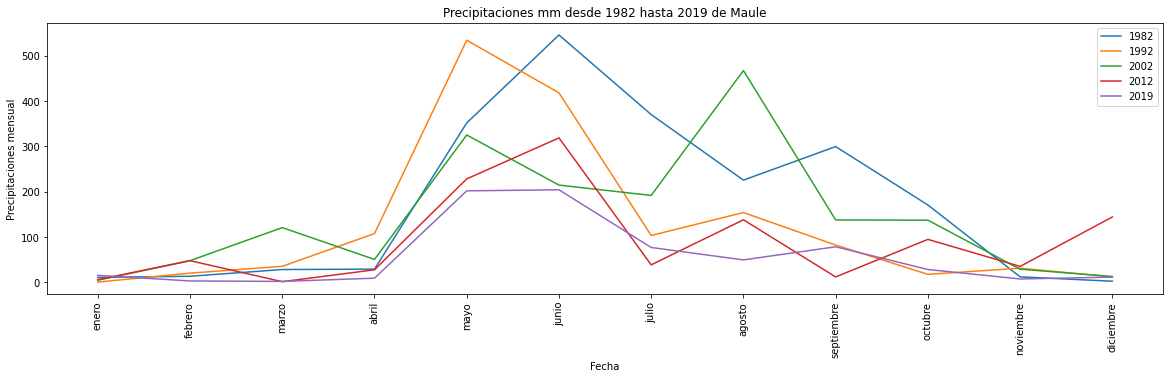

In [56]:
graficar_precipitaciones_anuales(precipitaciones,['1982','1992','2002', '2012', '2019'],
                                 'Maule')

De el gráfico se desprende que se desplazan las precipitaciones máximas a los largo de los años para los meses de de invierno (abril hasta septiembre -> temportada de lluvias). Manteniendose altos en los años 1982, 1992, y 2002. Pero luego, la máxima disminuye radicalmente en 2012. Donde caen las precipitaciones máximas y las precipitaciones en general. Finalmente en el año 2019, las precipitaciones son de las mas bajas. Por lo que se desprende claramente que a lo largo de los años han disminuido las precipitaciones, **por ende han aumentando los períodos de sequia**.

### 3.5 Crea una función que permita visualizar dos series históricas de PIB

In [57]:
banco_central = banco_central.reset_index(drop=True)
# periodo string formato mes-año
banco_central['Periodo-str'] = banco_central['Periodo'].apply(lambda x: str(x.month)+'-'+str(x.year))

In [58]:
def graficar_series_PIB(df, nombre_serie, fecha_inicio, fecha_fin):
    """
    Graficar series históricas de precipitaciones para un
    rango de fechas determinado
    df: pd.dataframe()
    region: str
    fecha_inicio: str (Y-m-d)
    fecha_fin: str ()
    """
    # transformar fechas a formato datetime
    fecha_inicio = datetime.strptime(fecha_inicio, '%Y-%m-%d')
    fecha_fin = datetime.strptime(fecha_fin, '%Y-%m-%d')
    
    # verificar fecha min
    if fecha_inicio < df['Periodo'].min():
        fecha_incio = df['Periodo'].min()
    # verificar fecha max
    if fecha_fin > df['Periodo'].max():
        fecha_fin = df['Periodo'].max()
    filtrar_data = df[(df['Periodo'] <= fecha_fin) & (df['Periodo'] >= fecha_inicio)]                      
    try:
        fecha_label = filtrar_data['Periodo-str'].to_list()
        pibs = filtrar_data[nombre_serie].to_list()
        plt.figure(figsize=(20,5))
        plt.plot(fecha_label, pibs)
        plt.xticks(rotation=90)
        plt.xlabel('Fecha')
        title = f"PIB {str(fecha_inicio)} hasta {str(fecha_fin)} de {nombre_serie}"
        plt.title(title)
        plt.show()
    except:
        pass

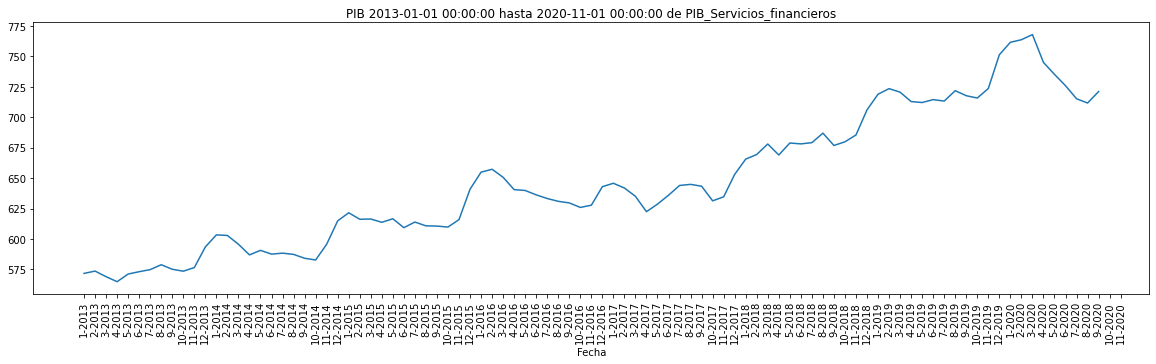

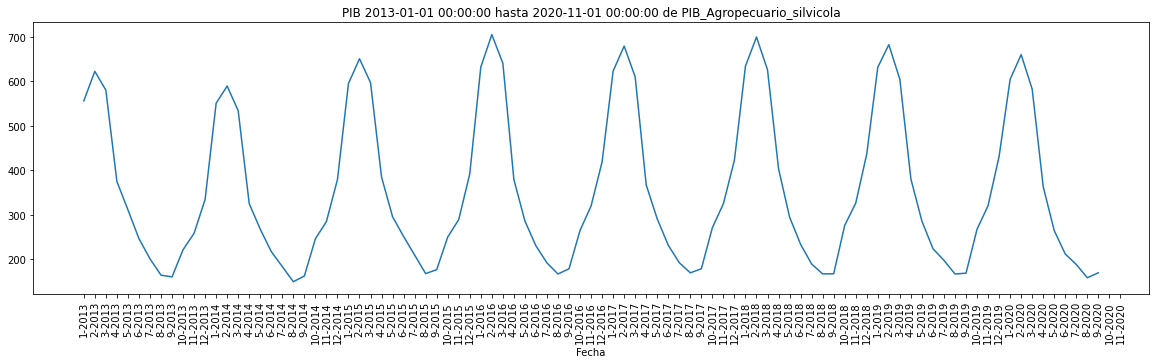

In [59]:
columnas_pib = ['PIB_Servicios_financieros','PIB_Agropecuario_silvicola']
fecha_inicio = '2013-01-01'
fecha_fin = banco_central['Periodo'].max().strftime('%Y-%m-%d')
for columna in columnas_pib:
    graficar_series_PIB(banco_central, columna, fecha_inicio, fecha_fin)

En la serie de tiempo PIB Servicios financieros se observa estacionalidad y tendencia desde 2013. La estacioanlidad tiene periodos de un año, donde en noviembre-diciembre comienza aumentar el valor del PIB de servicio financieros hasta abril del siguiente año, donde las variaciones comienza a ser menores.

La serie de tiempo PIB agropecuario silviola muestra estacionalidad de 12 meses. Donde en Enero se encuentran los PIBs mas alto (250 aprox), disminuyendo hasta Septiembre (200 aprox) y luego aumentando el valor del PIB hasta ENero del siguiente año.

Ambas serie se relacionan en que los peaks de los periodos se alcanzan en el mes de Enero y luego comienzan a disminuir relativamente hasta Septiembre. Por lo que su estacionalidad esta relacionada. 

## 4. Tratamiento y creación de variables

## 4.1 Correlación series de tiempo y variables

¿Cómo podríamos evaluar la correlación entre las distintas series de tiempo y cómo se  tienen  que  correlacionar  para  entrenar  un  modelo?  ¿Mucha  correlación,  no correlacionadas, da igual?


Para evaluar la correlación entre las distintas series de tiempo se puede comenzar con un método simple, que es la correlación de Pearson, que mide la correlación lineal entre 2 variables (con un valor de -1 a 1,donde los extremos indican correlación negativa y positiva, respectivamente.). Pero, en las series de tiempo existe una componente temporal, por lo que para hacer una análisis de correlación, se debe analizar la autocorrelación y además, la correlación cruzada con las otras series de tiempo. Para esto se necesitan estadisticas más complejas, como el test de causalidad de Granger.



La idea general es que variables muy correlacionadas, entregan información similiar o redundante, por lo que no "aportarían" a la capacidad predictiva del modelo de predicción. Además, para algunos modelos, como los modelos lineales, la colinealiad de muchas caraterísticas puede resultar en soluciones numericamente inestables. En otros modelos puede ayudar a mejorar o emporar ligeramente, como por ejemplo, en redes neuronales. No hay una respuesta clara, pero el análisis depende del número de caracteristicas y además de la magnitud de la colinealidad.

Para aminorar este tipo de problemas, se recomienda utilizar métodos ensamblados. 




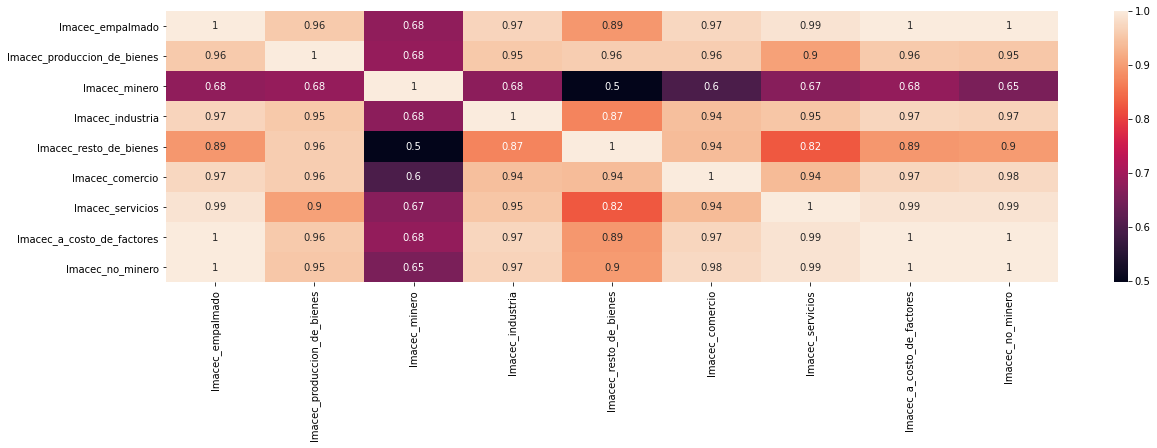

In [60]:
corrMatrix = banco_central_imacec.corr()
plt.figure(figsize=(20,5))
sn.heatmap(corrMatrix, annot=True)
plt.show()

Por ejemplo, hay calcular la matriz de correlación para el Imacec, se encuentra quehay variables altamente correlacionadas, estas podrían entregar información redudante a los modelos.

### 4.2 Precio leche

In [61]:
precio_leche = pd.read_csv('precio_leche.csv')

In [62]:
precio_leche.head()

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


In [63]:
# el formato de fecha de el dataset es '%Y-%m-%d'
print(precio_leche['Mes'].unique())

['Ene' 'Feb' 'Mar' 'Abr' 'May' 'Jun' 'Jul' 'Ago' 'Sep' 'Oct' 'Nov' 'Dic']


In [64]:
# diccionario con meses indexados
meses = {}
for (i,mes) in enumerate(precio_leche['Mes'].unique()):
    meses[mes] = i+1  
print(meses)

{'Ene': 1, 'Feb': 2, 'Mar': 3, 'Abr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Ago': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dic': 12}


In [65]:
# obtener string
precio_leche['date'] = precio_leche.apply(lambda x: str(x['Anio'])
                                                     + '-' + str(meses[x['Mes']])
                                                     + '-' + '01', axis=1)
# obtener datetime
precio_leche['date'] = precio_leche['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [66]:
precio_leche[['date', 'Precio_leche']].describe()

,Precio_leche
count,506.000000
mean,114.444980
std,78.999882
min,3.850000
25%,48.162500
50%,102.250000
75%,189.175000
max,318.880000


In [67]:
print('fecha minima precio leche', precio_leche['date'].min())
print('fecha maxima precio leche', precio_leche['date'].max())

fecha minima precio leche 1979-01-01 00:00:00
fecha maxima precio leche 2021-02-01 00:00:00


In [68]:
precipitaciones

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios,date-str
0,1979-01-01,2.641948,0.587062,2.447114,1.608992,3.736215,17.859634,25.212940,45.596447,1-1979
1,1979-02-01,1.179804,2.432192,3.997852,4.346310,16.347637,17.680612,18.085072,34.075039,2-1979
2,1979-03-01,0.255490,0.020601,0.000000,0.055488,0.545324,14.435698,28.696504,66.232248,3-1979
3,1979-04-01,10.173699,11.745779,13.722349,12.989194,21.880607,39.136483,43.617921,73.548127,4-1979
4,1979-05-01,1.039098,18.609286,50.187148,104.451550,143.914334,219.729235,279.409718,438.005116,5-1979
...,...,...,...,...,...,...,...,...,...,...
491,2019-12-01,0.287895,0.165390,3.601443,6.198806,11.327313,14.014122,27.321858,62.170090,12-2019
492,2020-01-01,3.299797,2.003685,6.937148,6.154279,7.875591,19.518225,35.916618,63.389625,1-2020
493,2020-02-01,0.179216,0.003701,0.032064,0.017628,0.200483,10.108504,29.001988,55.838889,2-2020
494,2020-03-01,0.003451,0.000666,0.000000,0.000000,0.115566,12.462699,28.310937,73.640866,3-2020


In [69]:
# juntar dateset

database = precipitaciones.merge(precio_leche, how='outer', on=['date'])
banco_central = banco_central.rename(columns={'Periodo':'date'})
database = database.merge(banco_central, how='outer',on=['date'])

### 4.3 Crea variables

Agregar variables asociadas a los años, ayudará a agregar información sobre la temporalidad de la serie de tiempo.

Dado que las estaciones del año, estan asociadas al precio de la leche, esta estaciones duran 3 meses

1. Verano: desde el 21 de diciembre (solsticio) al 20 de marzo (equinoccio).
2. Otoño: desde el 20 de marzo (equinoccio) al 21 de junio (solsticio).
3. Invierno: desde el 21 de junio (solsticio) al 21 de septiembre (equinoccio).
4. Primavera: desde el 21 de septiembre (equinoccio) al 21 de diciembre (solsticio).

#### Fechas

In [70]:
# variables a partir de la fecha
database['date_year'] = database['date'].apply(lambda x: x.year)
database['date_month'] = database['date'].apply(lambda x: x.month)


In [71]:
def calcular_trimestre(x):
    if (x>=1) and (x<=3):
        tri = 1
    elif (x>=4) and (x<=6):
        tri = 2
    elif (x>=7) and (x<=9):
        tri = 3
    else:
        tri = 4
    return tri

database['trimestre'] = database['date'].apply(lambda x: calcular_trimestre(x.month))
    

#### Se seleccionan columnan que se creen relevante por su relación con la ganadería y la macroeconomía:

In [72]:
columnas = ['Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago', 'Libertador_Gral__Bernardo_O_Higgins',
            'Maule', 'Biobio', 'La_Araucania', 'Los_Rios',
            'Precio_leche',
            'Imacec_comercio',
            'Imacec_no_minero',
            'PIB_Agropecuario_silvicola',
            'PIB_Mineria_del_cobre',
            'PIB_Alimentos',
            'PIB_Comercio',
            'PIB_Transporte', 
            'Impuesto_al_valor_agregado',
            'Derechos_de_Importacion',
            'PIB',
            'Ocupacion_en_Agricultura_INE',
            'Ocupacion_en_Transporte_y_almacenamiento_INE',
            'Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE',
            'Indice_de_produccion_industrial', 'Indice_de_produccion_industrial__mineria',
            'Indice_de_ventas_comercio_real_IVCM']

#### Lags

In [73]:
# variables lags y estadisticas acumuludas
# lags
# como estadisitcas lags, se crearan el mes anterior (t-1) y el año anterior (t-12)
database.sort_values(by=['date'], inplace=True)
for columna in columnas:
    # (t-1)
    name_columna1 = columna + '_t1'
    # (t-12)
    name_columna2 = columna + '_t12'
    database[name_columna1] = database[columna].shift(1)
    database[name_columna2] = database[columna].shift(12)

In [74]:
database[['date','Coquimbo', 'Coquimbo_t1', 'Coquimbo_t12']][200:220]

,date,Coquimbo,Coquimbo_t1,Coquimbo_t12
92,1986-09-01,6.526915,35.513987,6.281458
93,1986-10-01,7.550425,6.526915,8.298556
94,1986-11-01,0.352732,7.550425,0.110229
95,1986-12-01,0.846477,0.352732,0.106915
96,1987-01-01,1.717190,0.846477,0.157961
97,1987-02-01,8.210614,1.717190,4.360065
98,1987-03-01,13.476556,8.210614,0.094307
99,1987-04-01,2.332065,13.476556,4.190346
100,1987-05-01,55.869556,2.332065,72.567091
101,1987-06-01,19.659797,55.869556,39.870961


#### Estadisticas promedios

Estadisticas promedio últimos 3 meses y último año.

In [75]:
columnas_precipitaciones = ['Coquimbo', 'Valparaiso', 'Metropolitana_de_Santiago',
                            'Libertador_Gral__Bernardo_O_Higgins', 'Maule', 'Biobio',
                            'La_Araucania', 'Los_Rios']

In [76]:
database.sort_values(by=['date'], inplace=True)
for columna in columnas_precipitaciones:
    # promedio 3 meses
    nombre_promedio_3 = columna+'_mean3'
    database[nombre_promedio_3] = database[columna].rolling(window=3).mean()
    # promedio 12 meses
    nombre_promedio_12 = columna+'_mean12'
    database[nombre_promedio_12] = database[columna].rolling(window=12).mean()
    # desviacion standar ultimo año
    nombre_std_12 = columna+'_std12'
    database[nombre_std_12] = database[columna].rolling(window=12).std()
    
    

In [77]:
database[['date','Coquimbo', 'Coquimbo_mean3', 'Coquimbo_mean12', 'Coquimbo_std12']][200:220]

,date,Coquimbo,Coquimbo_mean3,Coquimbo_mean12,Coquimbo_std12
92,1986-09-01,6.526915,18.441261,15.423351,22.536618
93,1986-10-01,7.550425,16.530442,15.361007,22.559143
94,1986-11-01,0.352732,4.810024,15.381216,22.544343
95,1986-12-01,0.846477,2.916545,15.442846,22.499758
96,1987-01-01,1.717190,0.972133,15.572782,22.407778
97,1987-02-01,8.210614,3.591427,15.893661,22.259695
98,1987-03-01,13.476556,7.801453,17.008848,21.725003
99,1987-04-01,2.332065,8.006412,16.853991,21.831045
100,1987-05-01,55.869556,23.892725,15.462530,18.184835
101,1987-06-01,19.659797,25.953806,13.778266,16.584152


## 5. Modelos

Para entrenar el modleo se seleccionaran manualmente y sin mucho conocimiento del proceso, las varibales mas relevantes, parta tener un mayor orden del dataset y no tener un dataset tan disperso (sparse) y con tantas características.


Para representar los datos de las precipitaciones, solo se dejan los datos de la región de la Araucania. Se podrian sumar las precipitaciones de la zonas sur, para precipitacioees representativas.


In [78]:
variables_modelo = ['date',
                    'La_Araucania',
                    'Precio_leche', 
                    'PIB_Agropecuario_silvicola',
                    'PIB_Alimentos',
                    'PIB',
                    'Ocupacion_en_Agricultura_INE',
                    'date_year', 'date_month', 'trimestre',
                    'La_Araucania_t1', 'La_Araucania_t12',
                    'Precio_leche_t1', 'Precio_leche_t12',
                    'PIB_Alimentos_t12',
                    'PIB_t12',
                    'Ocupacion_en_Agricultura_INE_t1',
                    'La_Araucania_mean3', 'La_Araucania_mean12',
                    'La_Araucania_std12', 'Los_Rios_mean3']


In [79]:
print('Cantidad de variables:',len(variables_modelo))

Cantidad de variables: 21


In [80]:
target = 'Precio_leche'
X = database[variables_modelo]
X = X.dropna()

In [81]:
print('Cantidad de datos:', len(X))

Cantidad de datos: 76


In [82]:
print('fecha maxima', X['date'].max())
print('fecha maxima', X['date'].min())
print('Cantidad de meses', (X['date'].max()-X['date'].min())/31)

fecha maxima 2020-04-01 00:00:00
fecha maxima 2014-01-01 00:00:00
Cantidad de meses 73 days 14:42:34.838709677


In [83]:
X.head(5)

,date,La_Araucania,Precio_leche,PIB_Agropecuario_silvicola,PIB_Alimentos,PIB,Ocupacion_en_Agricultura_INE,date_year,date_month,trimestre,...,La_Araucania_t12,Precio_leche_t1,Precio_leche_t12,PIB_Alimentos_t12,PIB_t12,Ocupacion_en_Agricultura_INE_t1,La_Araucania_mean3,La_Araucania_mean12,La_Araucania_std12,Los_Rios_mean3
420,2014-01-01,96.707966,213.02,550.5,323.8,112.1,709.9,2014,1,1,...,21.286717,199.43,186.63,331.2,109.7,667.2,61.312899,129.653846,87.493204,99.885960
421,2014-02-01,43.157411,219.03,589.1,326.8,107.4,736.3,2014,2,1,...,84.571386,213.02,189.52,330.7,104.0,709.9,51.086636,126.202681,90.207814,78.462718
422,2014-03-01,128.113100,227.45,533.6,397.2,121.6,724.4,2014,3,1,...,36.493313,219.03,197.60,367.8,118.1,736.3,89.326159,133.837664,85.688819,122.554802
423,2014-04-01,108.177327,232.47,325.1,371.7,118.4,717.3,2014,4,2,...,95.051980,227.45,201.70,382.1,116.8,724.4,93.149279,134.931443,85.231278,128.269255
424,2014-05-01,250.971478,244.29,267.6,366.2,119.0,691.1,2014,5,2,...,289.062544,232.47,221.60,373.4,116.7,717.3,162.420635,131.757187,79.484739,224.370767


Debido a que el dataset tiene muy pocas muestras, es muy probable realizar un **overfitting** sobre los datos, sobre todo si se utilizan modelos no lineales. Por ello, como primera prueba se utilizará una regresión lineal, y si utilizará como conjunto de test la data del último año (12). Se debe utilizar la información del último período, debido a la dependencia temporal de las variables. Además, el cojunto de test, debe contener información de un ciclo completo, debido a la estacionalidad del proceso.

Dado que hay tan pocos datos útiles (76 datos), sólo se utilizan 2 conjuntos, entrenamiento y test. Para evitar sobre ajustarnos al conjuntos de test, debemos realizar una sintonización de hyperparámetros "conservadora". Se elejirá el modelo con mejor resultado en el conjunto de test y que la diferencia con el conjunto de entrenamiento no sea tan grande, según la métrica que se escoja. 

## Conjuntos de datos (Entrenamiento y test)


In [84]:
fecha_test = '2019-05-01'
fecha_test = datetime.strptime(fecha_test,'%Y-%m-%d')

X_test = X[X['date'] >= fecha_test]
X_train = X[X['date'] < fecha_test]
y_train = X_train[target]
y_test = X_test[target]
fechas_test = X_test['date'].apply(lambda x: str(x.month)+'-'+str(x.year))

del X_train[target], X_test[target], X_train['date'], X_test['date']
print('Dimensiones X_train', X_train.shape)
print('Dimensiones X_test', X_test.shape)

Dimensiones X_train (64, 19)
Dimensiones X_test (12, 19)


## Modelo lineal

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# set seed para reporoducibilidad
np.random.seed(0)

rmse train  3.39, rmse test 18.77


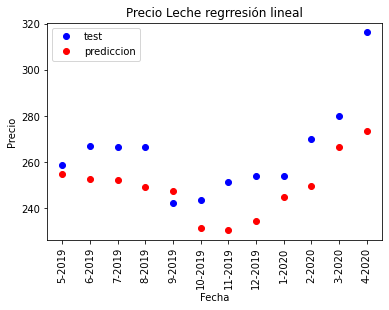

In [86]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# y = a* x_0 + b * x_1 + c
regresion_lineal = LinearRegression().fit(X_train, np.array(y_train))
y_pred_train = regresion_lineal.predict(X_train)
y_pred_lineal = regresion_lineal.predict(X_test)

rmse_lineal_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_lineal_test = np.sqrt(mean_squared_error(y_test,y_pred_lineal))
print('rmse train % 0.2f, rmse test %0.2f' % (rmse_lineal_train, rmse_lineal_test))
plt.plot(fechas_test.to_list(), y_test,  'bo')
plt.plot(fechas_test.to_list(), y_pred_lineal, 'ro')
plt.legend(['test','prediccion'])
plt.xticks(rotation=90)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio Leche regrresión lineal')


plt.show()

El modelo sin sintonización de hiperparámetros, logra predecir la tendencia de aumento o dismiución del precio. En especial el ciclo de octubre de 2019 a abril del 2020.

## Regresión lineal Lasso

rmse train  7.23, rmse test 23.25


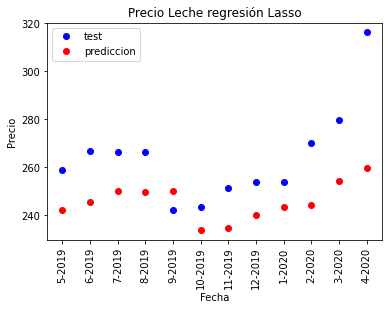

In [87]:
from sklearn.linear_model import Lasso
reg = Lasso(alpha=1.0, random_state=0)
reg.fit(X_train,y_train)
y_pred_train = reg.predict(X_train)
y_pred_lasso = reg.predict(X_test)

rmse_lasso_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_lasso_test = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
print('rmse train % 0.2f, rmse test %0.2f' % (rmse_lasso_train, rmse_lasso_test))

plt.plot(fechas_test.to_list(), y_test,  'bo')
plt.plot(fechas_test.to_list(), y_pred_lasso, 'ro')
plt.legend(['test','prediccion'])
plt.xticks(rotation=90)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio Leche regresión Lasso')


plt.show()

In [88]:
# se utilizan parametros de penalizacion conservaadores para evitar overfitting
from xgboost import XGBRegressor
model = XGBRegressor()
model = XGBRegressor(n_estimators=5, max_depth=3, eta=1)
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, eta=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints=None,
             learning_rate=1, max_delta_step=0, max_depth=3, min_child_weight=1,
             missing=nan, monotone_constraints=None, n_estimators=5, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method=None,
             validate_parameters=False, verbosity=None)

rmse train  1.88, rmse test 32.01


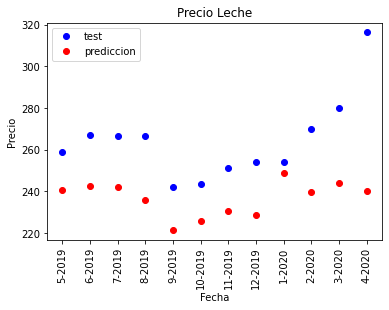

In [89]:
y_pred_train = model.predict(X_train)
y_pred_xgboost = model.predict(X_test)

rmse_xgboost_train = np.sqrt(mean_squared_error(y_train,y_pred_train))
rmse_xgboost_test = np.sqrt(mean_squared_error(y_test,y_pred_xgboost))
print('rmse train % 0.2f, rmse test %0.2f' % (rmse_xgboost_train, rmse_xgboost_test))
plt.plot(fechas_test.to_list(), y_test,  'bo')
plt.plot(fechas_test.to_list(), y_pred_xgboost, 'ro')
plt.legend(['test','prediccion'])
plt.xticks(rotation=90)
plt.xlabel('Fecha')
plt.ylabel('Precio')
plt.title('Precio Leche')
plt.show()

In [90]:
rmse_lineal = np.sqrt(mean_squared_error(y_test,y_pred_lineal))
rmse_lasso = np.sqrt(mean_squared_error(y_test,y_pred_lasso))
rmse_xgboost = np.sqrt(mean_squared_error(y_test,y_pred_xgboost))
print('rmse_lineal: %0.3f' % (rmse_lineal))
print('rmse_lasso: %0.3f' % (rmse_lasso))
print('rmse_xgboost: %0.3f' % (rmse_xgboost))

rmse_lineal: 18.772
rmse_lasso: 23.249
rmse_xgboost: 32.009


Para evaluar los resultados del modelo se utiliza el rmse, ya que permite penalizar errores grandes. En este caso, el mejor modelo es es la regresión lineal. Además, es el que recomiendo utilizar dada la poca cantidad de datos, los otros modelos se sobreajustan a los conjuntos de entrenamientos. También, debemos ser cuidadosos de no sobreajustarnos al conjuntos de test. El modelo con mejor desempeño es la **regresión  lineal**. Esta no se sobre ajuste al conjunto de entrenamiento, se obtiene un rmse de 3.83 y en el conjunto de test un remse de 18.77. Lo que no es un error tan alto comparado con el rango de valores, con un mínimo de 220. Es decir, cercanos al 7%.

Del gráfico del modelo lineal se observa que se predice adecuadamente la tendencia, en donde hau un sesgo en los resultados de predicción, ya que se sobreestima el valor real por un valor aproximadamente constante.

### Respuesta de la sección 5

1. **Si necesitas crear variables adicionales que pueden aportar información al modelo, tienes total libertad**: Utilizaria variables relacionadas a la variación de los indicadores PIB, IMACEC, más que el valor puntual, ya que esto aporta información de la tendencia de estos indicadores, de un mes a otro.

2. **Construye  una  base  de  test  (o  de  cross  validation).  ¿Cuál  fue  tu  definición  de tiempo/cantidad de datos para este set de datos? Explica por qué la elegiste así.**

    Debido a que el dataset tiene muy pocas muestras, es muy probable realizar un **overfitting** sobre los datos, sobre todo si se utilizan modelos no lineales. Por ello, como primera prueba se utilizará una regresión lineal, y si utilizará como conjunto de test la data del último año (12). Se debe utilizar la información del último período, debido a la dependencia temporal de las variables. Además, el cojunto de test, debe contener información de un ciclo completo, debido a la estacionalidad del proceso.

    Dado que hay tan pocos datos útiles (76 datos), sólo se utilizan 2 conjuntos, entrenamiento y test. Para evitar sobre ajustarnos al conjuntos de test, debemos realizar una sintonización de hyperparámetros "conservadora". Se elejirá el modelo con mejor resultado en el conjunto de test y que la diferencia con el conjunto de entrenamiento no sea tan grande, según la métrica que se escoja. 
    
3. **¿Qué datos adicionales te gustaría tener?¿Qué datos son necesarios para que este modelo funcione/mejore las métricas?** Me gustaría tener datos acerca de la proucción de leche mensual, como la cantidad de vacas asocidas a la producción en cada región. La tasa de ocupación en la industria ganadera productora de leche, además del valor de los insumos necesarios para alimentar a las vacas (productoras de leche), como el valor de los fardos de pasto. 
    Los datos para que este modelo mejore las métricas, son variable independientes, que esta correlacionadas y que muestren **causalidad** con el precio de la leche o la producción de leche, ya que se podría asumir que la demanda por leche es constante, por lo que la demanda no afectaría al precio.

4. **¿Cómo evalúas el resultado del modelo?¿Qué métricas tiene sentido mirar?** Para evaluar los resultados del modelo se utiliza el rmse, ya que permite penalizar errores grandes. En este caso, el mejor modelo es es la regresión lineal. Además, es el que recomiendo utilizar dada la poca cantidad de datos, los otros modelos se sobreajustan a los conjuntos de entrenamientos. También, debemos ser cuidadosos de no sobreajustarnos al conjuntos de test. El modelo con mejor desempeño es la **regresión  lineal**. Esta no se sobre ajuste al conjunto de entrenamiento, se obtiene un rmse de 3.83 y en el conjunto de test un remse de 16.638. Lo que no es un error tan alto comparado con el rango de valores, con un mínimo de 220. Es decir, cercanos al 7%.

    Del gráfico del modelo lineal se observa que se predice adecuadamente la tendencia, en donde hau un sesgo en los resultados de predicción, ya que se sobreestima el valor real por un valor aproximadamente constante.
    
    Se puede utiliza otra métrica como el MAE, pero esta metrica no penaliza los errores grande. Si no que los considera todos de las misma forma.
    
5. **¿Para qué aplicaciones puede servir un modelo de este tipo?En particular, ¿Cómo podría ayudar a combatir el cambio climático?**

    Dado que el precio de la leche esta relacionado inversamente a variables medioambienteles , como la disponibilidad de recursos hidricos (por lo que la sequía provoca un aumento del precio de la leche),precipitaciones,  la disponilidad de terrenos para que los animales coman pasto, este modelo podría servir para conocer como se espera  que evolucionen (la tendencia) la disponibilidad y estado de estos recursos. Lo que permite tomar medidas anticipadas para escenarios a largo plazo y también realizar simulaciones de diferentes escenarios. 

